<div style="text-align: center;"> <span style="color:brown; font-weight:bold; font-size: 30px">Final Project- Sentiment Analysis using Amazon Reviews Dataset </span> </div>

Source: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Setting up PySpark</span>

In [1]:
# Setting Pyspark environment

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('final_project').getOrCreate() # create a spark session
spark

# Check number of executors including drivers currently part of the Spark cluster or application.
spark._jsc.sc().getExecutorMemoryStatus().keySet().size() 

# sparkcontext helps to run tasks in parallel
sc 

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1731893522892_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-1>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Installing and Importing Packages</span>

In [2]:
# Installing
sc.install_pypi_package("s3fs")
sc.install_pypi_package("fsspec")
sc.install_pypi_package("pandas")
sc.install_pypi_package("numpy")
sc.install_pypi_package("sklearn")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…



  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Not uninstalling python-dateutil at /usr/lib/python3.9/site-packages, outside environment /mnt/yarn/usercache/livy/appcache/application_1731893522892_0002/container_1731893522892_0002_01_000001/tmp/spark-12d8417b-fb9d-41a0-90a9-cdcde6b07d6f
    Can't uninstall 'python-dateutil'. No files were found to uninstall.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup

In [3]:
# Importing
import s3fs
import pandas as pd
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

 <div style="text-align: center;"> <span style="color:blue; font-weight:bold; font-size: 24px"> Reading Ingested Dataset from S3 </span> </div>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Reading raw data</span>

In [4]:
# Reading staged data from S3 as spark data frame

s3_path  = "s3://test-bucket-areena/test/combined/combined_train_test.csv"

sdf_combined = spark.read.csv(path=s3_path, header=True, inferSchema=True)

sdf_combined.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------------------+--------------------+
|polarity|               title|         description|
+--------+--------------------+--------------------+
|       1|Simply not a good...|I would have turn...|
|       2|If you love Olive...|Sit down, buckle ...|
|       2|Savages don't mak...|I liked this movi...|
|       1|       Disappointing|"After his hugely...|
|       1|             Savages|Everyone(with the...|
|       1|                 Meh|"The movie's prem...|
|       1|Worste movie of 2012|Terrible movie. I...|
|       1|   Really really bad|Wow, what a horri...|
|       2|          I liked it|Similarities to t...|
|       1|               Gross|This movie was ju...|
+--------+--------------------+--------------------+
only showing top 10 rows

<div style="text-align: center;"> <span style="color:blue; font-weight:bold; font-size: 24px"> Exploratory Data Analysis (EDA) </span> </div>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Installing and Importing libraries for Exploration</span>

In [5]:
# Installing
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("seaborn")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
# Importing
from pyspark.sql.functions import *
from pyspark.sql.types import StringType,IntegerType
from pyspark.sql import functions as F

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Schema Display</span>

In [7]:
# Exploring the schema and data types of each column in the new combined dataset

print(sdf_combined.printSchema())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- polarity: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- description: string (nullable = true)

None

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Null Values Count</span>

In [8]:
def null_value_calc(df):
    null_columns_counts = []
    numRows = df.count()
    for k in df.columns:
        nullRows = df.where(col(k).isNull()).count()
        if(nullRows > 0):
            temp = k,nullRows,(nullRows/numRows)*100
            null_columns_counts.append(temp)
    return(null_columns_counts)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
null_columns = null_value_calc(sdf_combined)
spark.createDataFrame(null_columns, ['Column_Name', 'Null_Values_Count','Null_Value_Percent']).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+--------------------+
|Column_Name|Null_Values_Count|  Null_Value_Percent|
+-----------+-----------------+--------------------+
|      title|               26|0.002168808364927032|
|description|               31|0.002585886896643769|
+-----------+-----------------+--------------------+

<span style="color:green; font-weight: bold; font-size: 13px">Some Null Values present, that are required to be eliminated. </span>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Checking for Class Imbalance</span>

In [10]:
# Checking class imbalance for dataset
polarity_count = sdf_combined.groupBy("polarity").count()
polarity_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------+
|polarity| count|
+--------+------+
|       1|599421|
|       2|599394|
+--------+------+

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Bar Plot for Class Distribution</span>

In [11]:
# Reading staged data as pandas dataframe for visualization
df_combined = pd.read_csv(s3_path)
polarity_count= df_combined['polarity'].value_counts()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bars = ax.bar(polarity_count.index, polarity_count.values, color=['blue', 'orange'])

# Add counts on top of each bar
for index, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
            ha='center', va='bottom', fontsize=10)

# Add labels and title
ax.set_xlabel('Polarity')
ax.set_ylabel('Frequency')
ax.set_title('Polarity Distribution in Amazon Reviews')

# Show the plot
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

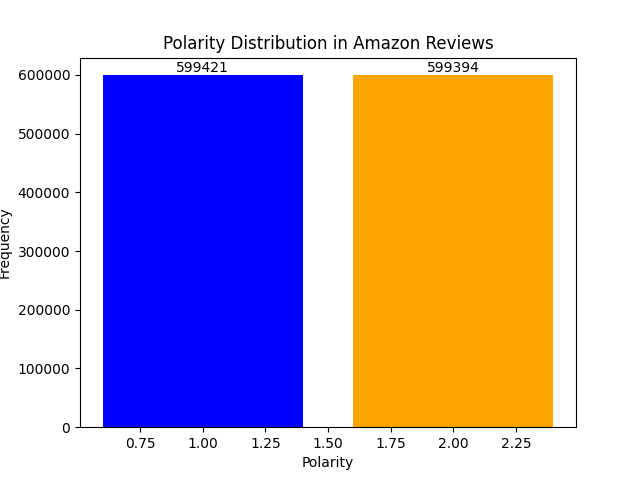

In [13]:
%matplot plt

<span style="color:green; font-weight: bold; font-size: 13px">The polarity counts are almost the same, hence it can be said that there is no class imbalance.</span>

<div style="text-align: center;"> <span style="color:blue; font-weight:bold; font-size: 24px"> Data Preprocessing / Cleaning </span> </div>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Removing Null Values from the Data</span>

In [14]:
# Removing rows with null values from new combined dataset
new_sdf_combined = sdf_combined.na.drop()

null_counts = new_sdf_combined.select([sum(col(c).isNull().cast("int")).alias(c) for c in new_sdf_combined.columns])

null_counts.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-----+-----------+
|polarity|title|description|
+--------+-----+-----------+
|       0|    0|          0|
+--------+-----+-----------+

<span style="color:green; font-weight: bold; font-size: 13px">All the null values have been dropped from the dataframe.</span>

In [15]:
renamed_sdf = new_sdf_combined.withColumnRenamed("polarity", "sentiment")
renamed_sdf.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|sentiment|               title|         description|
+---------+--------------------+--------------------+
|        1|Simply not a good...|I would have turn...|
|        2|If you love Olive...|Sit down, buckle ...|
|        2|Savages don't mak...|I liked this movi...|
|        1|       Disappointing|"After his hugely...|
|        1|             Savages|Everyone(with the...|
+---------+--------------------+--------------------+
only showing top 5 rows

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Joining 'title' and 'description' columns</span>

In [16]:
combined_columns = renamed_sdf.withColumn("combined_text", concat(col("title"), lit(" "), col("description")))

combined_columns.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+--------------------+
|sentiment|               title|         description|       combined_text|
+---------+--------------------+--------------------+--------------------+
|        1|Simply not a good...|I would have turn...|Simply not a good...|
|        2|If you love Olive...|Sit down, buckle ...|If you love Olive...|
|        2|Savages don't mak...|I liked this movi...|Savages don't mak...|
|        1|       Disappointing|"After his hugely...|Disappointing "Af...|
|        1|             Savages|Everyone(with the...|Savages Everyone(...|
+---------+--------------------+--------------------+--------------------+
only showing top 5 rows

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Removing irrelevant symbols and characters</span>

In [17]:
#Removing anything that is not a letter
regex_sdf = combined_columns.withColumn("combined_text",regexp_replace(combined_columns["combined_text"], '[^A-Za-z ]+', ''))

# Remove white spaces
regex_sdf = regex_sdf.withColumn("combined_text",regexp_replace(regex_sdf["combined_text"], ' +', ' '))

regex_sdf.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+--------------------+
|sentiment|               title|         description|       combined_text|
+---------+--------------------+--------------------+--------------------+
|        1|Simply not a good...|I would have turn...|Simply not a good...|
|        2|If you love Olive...|Sit down, buckle ...|If you love Olive...|
|        2|Savages don't mak...|I liked this movi...|Savages dont make...|
|        1|       Disappointing|"After his hugely...|Disappointing Aft...|
|        1|             Savages|Everyone(with the...|Savages Everyonew...|
+---------+--------------------+--------------------+--------------------+
only showing top 5 rows

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Converting all characters to lowercase</span>

In [18]:
# Lower case everything
clean_sdf = regex_sdf.withColumn("combined_text",lower(regex_sdf["combined_text"]))

clean_sdf.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+--------------------+
|sentiment|               title|         description|       combined_text|
+---------+--------------------+--------------------+--------------------+
|        1|Simply not a good...|I would have turn...|simply not a good...|
|        2|If you love Olive...|Sit down, buckle ...|if you love olive...|
|        2|Savages don't mak...|I liked this movi...|savages dont make...|
|        1|       Disappointing|"After his hugely...|disappointing aft...|
|        1|             Savages|Everyone(with the...|savages everyonew...|
+---------+--------------------+--------------------+--------------------+
only showing top 5 rows

<span style="color:green; font-weight: bold; font-size: 13px">Resulting data with an extra column without any irrelevant characters with all lowercased letters</span>

<div style="text-align: center;"> <span style="color:blue; font-weight:bold; font-size: 24px"> Tokenization </span> </div>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">Spark's MLlib Tokenizer Package</span>

In [19]:
from pyspark.ml.feature import Tokenizer

tokenizer = Tokenizer(inputCol="combined_text", outputCol="tokens")
sdf_tokenized = tokenizer.transform(clean_sdf)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
sdf_tokenized.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+--------------------+--------------------+
|sentiment|               title|         description|       combined_text|              tokens|
+---------+--------------------+--------------------+--------------------+--------------------+
|        1|Simply not a good...|I would have turn...|simply not a good...|[simply, not, a, ...|
|        2|If you love Olive...|Sit down, buckle ...|if you love olive...|[if, you, love, o...|
|        2|Savages don't mak...|I liked this movi...|savages dont make...|[savages, dont, m...|
|        1|       Disappointing|"After his hugely...|disappointing aft...|[disappointing, a...|
|        1|             Savages|Everyone(with the...|savages everyonew...|[savages, everyon...|
+---------+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px">PySpark's MLlib StopWords Removal Package</span>

In [21]:
from pyspark.ml.feature import StopWordsRemover

remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens")
clean_sdf_tokenized = remover.transform(sdf_tokenized)

clean_sdf_tokenized.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+--------------------+--------------------+--------------------+
|sentiment|               title|         description|       combined_text|              tokens|     filtered_tokens|
+---------+--------------------+--------------------+--------------------+--------------------+--------------------+
|        1|Simply not a good...|I would have turn...|simply not a good...|[simply, not, a, ...|[simply, good, mo...|
|        2|If you love Olive...|Sit down, buckle ...|if you love olive...|[if, you, love, o...|[love, oliver, st...|
|        2|Savages don't mak...|I liked this movi...|savages dont make...|[savages, dont, m...|[savages, dont, m...|
|        1|       Disappointing|"After his hugely...|disappointing aft...|[disappointing, a...|[disappointing, h...|
|        1|             Savages|Everyone(with the...|savages everyonew...|[savages, everyon...|[savages, everyon...|
+---------+--------------------+--------------------+-----------

<span style="color:green; font-weight: bold; font-size: 13px">Resultant Dataframe with Tokens after elimanation of Stop Words</span>

<div style="text-align: center;"> <span style="color:blue; font-weight:bold; font-size: 24px"> Data Transformation / Feature Engineering </span> </div>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Count Vectorizer from Spark's MLlib Feature Package to convert words to vectors </span>

In [22]:
from pyspark.ml.feature import CountVectorizer

count_vectorizer = CountVectorizer(inputCol="filtered_tokens", outputCol="features")
count_vectorizer_model = count_vectorizer.fit(clean_sdf_tokenized)
vector_data = count_vectorizer_model.transform(clean_sdf_tokenized)
vector_data.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|sentiment|               title|         description|       combined_text|              tokens|     filtered_tokens|            features|
+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|        1|Simply not a good...|I would have turn...|simply not a good...|[simply, not, a, ...|[simply, good, mo...|(262144,[2,3,9,29...|
|        2|If you love Olive...|Sit down, buckle ...|if you love olive...|[if, you, love, o...|[love, oliver, st...|(262144,[9,11,15,...|
|        2|Savages don't mak...|I liked this movi...|savages dont make...|[savages, dont, m...|[savages, dont, m...|(262144,[3,4,8,9,...|
|        1|       Disappointing|"After his hugely...|disappointing aft...|[disappointing, a...|[disappointing, h...|(262144,[1,18,89,...|
|        1|             Savages|Ev

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Exploring the feature vector data </span>

In [23]:
# Checking the schema for new vectorized data
vector_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- sentiment: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- combined_text: string (nullable = true)
 |-- tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- filtered_tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)

<span style="color:green; font-weight: bold; font-size: 13px">Features column has datatype 'vector' used for modeling in NLP</span>

In [24]:
# Count of rows in the vectorized dataset
print(f"Count of Rows in the New Vectorized Dataset:{vector_data.count()}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Count of Rows in the New Vectorized Dataset:1198758

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Splitting Feature Data Vectors into training (80%) and testing (20%) data </span>

In [25]:
# Using Random Split 
train_data, test_data = vector_data.randomSplit([0.8, 0.2], seed=42)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
# Count of rows in each dataset
print(f"Training Dataset Count: {train_data.count()}")
print(f"Testing Dataset Count: {test_data.count()}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Training Dataset Count: 959306
Testing Dataset Count: 239452

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 12px"> Training Data </span>

In [27]:
# Checking class imbalance in the train dataset

class_train = train_data.groupBy("sentiment").count()
class_train.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------+
|sentiment| count|
+---------+------+
|        1|479913|
|        2|479393|
+---------+------+

<span style="color:green; font-weight: bold; font-size: 13px"> Training Classes are Balanced</span>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 12px"> Testing Data </span>

In [28]:
# Checking class imbalance in the test dataset

class_test = test_data.groupBy("sentiment").count()
class_test.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------+
|sentiment| count|
+---------+------+
|        1|119478|
|        2|119974|
+---------+------+

<span style="color:green; font-weight: bold; font-size: 13px"> Testing Classes are Balanced </span>

<div style="text-align: center;"> <span style="color:blue; font-weight:bold; font-size: 24px"> Data Modeling </span> </div>

<span style="color:brown; font-weight:bold; font-size: 18px">Model: Logistic Regression Classifier </span>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Train the model on Training Data </span>

In [29]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol="features", labelCol="sentiment", maxIter=10)
lr_model = lr.fit(train_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Predictions on the Test Data </span>

In [30]:
# Predictions on test data
predictions_lr_test = lr_model.transform(test_data)

predictions_lr_test.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|sentiment|               title|         description|       combined_text|              tokens|     filtered_tokens|            features|       rawPrediction|         probability|prediction|
+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        1|!!!! Wrong MP3 fi...|The MP3 files dow...| wrong mp files t...|[, wrong, mp, fil...|[, wrong, mp, fil...|(262144,[102,204,...|[-8.7206257858982...|[3.98521419265735...|       1.0|
|        1| !!READERS CAUTION!!|"Now that you hav...|readers caution n...|[readers, caution...|[readers, caution...|(262144,[5,7,110,...|[-8.7205044409752...|[2.58506245663132...|       1.0|
|        1|      !Qué simpleza!|"No había oíd

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Predictions on the Training Data </span>

In [31]:
# Predictions on the train data
predictions_lr_train = lr_model.transform(train_data)
predictions_lr_train.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|sentiment|               title|         description|       combined_text|              tokens|     filtered_tokens|            features|       rawPrediction|         probability|prediction|
+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        1|! LONG LIVE THE F...|"Uau, what a bad ...| long live the fo...|[, long, live, th...|[, long, live, fo...|(262144,[0,9,29,4...|[-8.7206264410159...|[6.22083702414199...|       1.0|
|        1|!!!! WASTE OF MON...|I bought this swi...| waste of money i...|[, waste, of, mon...|[, waste, money, ...|(262144,[4,6,14,2...|[-8.7205028071403...|[1.60359085471564...|       1.0|
|        1|       !!!CAUTION!!!|While Panason

<div style="text-align: center;"> <span style="color:blue; font-weight:bold; font-size: 24px">Model Evaluation and Results </span> </div>

<span style="color:brown; font-weight:bold; font-size: 18px">Evaluation of Logistic Regression Model when predicted on Test Data </span>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Evaluation using Accuracy </span>

In [32]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 12px"> Testing Accuracy </span>

In [33]:
evaluator_test = MulticlassClassificationEvaluator(labelCol="sentiment", predictionCol="prediction", metricName="accuracy")
accuracy_test = evaluator_test.evaluate(predictions_lr_test)
print(f"Accuracy of Logistic Regression on Testing Data: {accuracy_test}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy of Logistic Regression on Testing Data: 0.8524505955264521

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 12px"> Training Accuracy </span>

In [34]:
evaluator_train = MulticlassClassificationEvaluator(labelCol="sentiment", predictionCol="prediction", metricName="accuracy")
accuracy_train = evaluator_train.evaluate(predictions_lr_train)
print(f"Accuracy of Logistic Regression on Training Data: {accuracy_train}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy of Logistic Regression on Training Data: 0.9475068434889389

<span style="color:green; font-weight: bold; font-size: 13px"> From the Testing and Training Accuracies, the Model generalizes well to the unseen data</span>

<div style="text-align: center;"> <span style="color:blue; font-weight:bold; font-size: 24px"> Visualizations on Evaluation Scores </span> </div>

<span style="color:brown; font-weight:bold; font-size: 18px">Confusion Matrix for Logistic Regression Model </span>

In [35]:
# Dataframe with only columns that are of interest

predictions_cm = predictions_lr_test.select("sentiment", "prediction").toPandas()
predictions_cm.head(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   sentiment  prediction
0          1         1.0
1          1         1.0
2          1         2.0
3          1         1.0
4          1         1.0

In [36]:
# Accessing true labels and predicted labels

true_labels = predictions_cm["sentiment"]
predicted_labels = predictions_cm["prediction"]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Confusion Matrix </span>

In [37]:
from sklearn.metrics import *

ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels)

plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

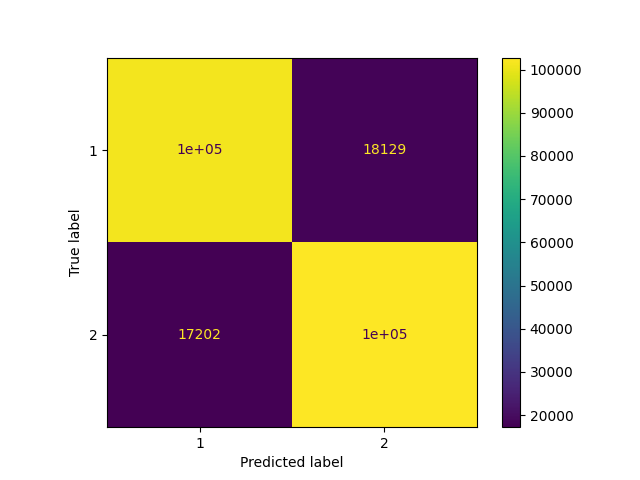

In [38]:
%matplot plt

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Evaluation using F1 Score </span>

In [39]:
f1 = f1_score(true_labels, predicted_labels) 
print(f"F1 Score for True Labels vs Predicted Labels: {f1:.2f}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

F1 Score for True Labels vs Predicted Labels: 0.85

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Classification Report to Analyze Precision, Recall and F1 Score </span>

In [40]:
print("\nClassification Report for Logistic Regression Prediction:")
print(classification_report(true_labels, predicted_labels))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


Classification Report for Logistic Regression Prediction:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85    119478
           2       0.85      0.86      0.85    119974

    accuracy                           0.85    239452
   macro avg       0.85      0.85      0.85    239452
weighted avg       0.85      0.85      0.85    239452

<span style="color:green; font-weight: bold; font-size: 13px"> The Recall, Precision and F1 scores are the same. This usually happens when the model is well optimized and deals with real time predictions. This is a Binary classification problem with well-balanced classes. Hence, there is a high chance of these scores being close to each other. </span>

<span style="color:brown; font-weight:bold; font-size: 18px">AUC Score and ROC Curve </span>

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Probabilities for Predictions </span>

In [41]:
# Get predicted probabilities from test data
pred_prob_test = predictions_lr_test.select("probability", "sentiment")
pred_prob_test.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+
|         probability|sentiment|
+--------------------+---------+
|[3.98521419265735...|        1|
|[2.58506245663132...|        1|
|[1.53218775447029...|        1|
|[4.85440732912723...|        1|
|[1.22771844613667...|        1|
+--------------------+---------+
only showing top 5 rows

In [42]:
# Convert Spark DataFrame to Pandas DataFrame
pred_prob_test_pd = pred_prob_test.toPandas()
pred_prob_test_pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                              probability  sentiment
0       [3.985214192657359e-07, 0.96200836204971, 0.03...          1
1       [2.5850624566313255e-08, 0.9998462260543645, 0...          1
2       [1.5321877544702912e-09, 5.387780374816799e-07...          1
3       [4.854407329127231e-08, 0.9994574735354749, 0....          1
4       [1.227718446136676e-09, 0.999999652006713, 3.4...          1
...                                                   ...        ...
239447  [1.280801025581929e-12, 3.771852064831546e-13,...          2
239448  [6.308273154147451e-07, 0.8980385524725669, 0....          2
239449  [6.08517472042702e-07, 0.09406346488465185, 0....          2
239450  [2.1294697180042434e-08, 0.0001043355005284721...          2
239451  [7.836396683973676e-11, 1.412069429900997e-09,...          2

[239452 rows x 2 columns]

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Extracting the Probabilities for Positive Class </span>

In [43]:
# Extract probability of positive class (Class 2)
y_probs = pred_prob_test_pd["probability"].apply(lambda x: x[2])
y_test = pred_prob_test_pd["sentiment"]

y_probs

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0         3.799124e-02
1         1.537481e-04
2         9.999995e-01
3         5.424779e-04
4         3.467656e-07
              ...     
239447    1.000000e+00
239448    1.019608e-01
239449    9.059359e-01
239450    9.998956e-01
239451    1.000000e+00
Name: probability, Length: 239452, dtype: float64

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> Extracting the Probabilities for Negative Class </span>

In [44]:
# Extract probability of negative class (Class 1)
y_probs_neg = pred_prob_test_pd["probability"].apply(lambda x: x[1])
y_test_neg = pred_prob_test_pd["sentiment"]

y_probs_neg

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0         9.620084e-01
1         9.998462e-01
2         5.387780e-07
3         9.994575e-01
4         9.999997e-01
              ...     
239447    3.771852e-13
239448    8.980386e-01
239449    9.406346e-02
239450    1.043355e-04
239451    1.412069e-09
Name: probability, Length: 239452, dtype: float64

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> AUC for Positive Class </span>

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute AUC
fpr, tpr, thresholds = roc_curve(y_test == 2, y_probs)
auc = roc_auc_score(y_test == 2, y_probs)
print(f"AUC for Positive Class (Class 2): {auc}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

AUC for Positive Class (Class 2): 0.9163326927714823

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> AUC for Negative Class </span>

In [46]:
# Compute AUC
fpr_n, tpr_n, thresholds_n = roc_curve(y_test == 1, y_probs_neg)
auc_neg = roc_auc_score(y_test == 1, y_probs_neg)
print(f"AUC for Negative Class (Class 1): {auc_neg}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

AUC for Negative Class (Class 1): 0.9163326923529046

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> ROC Curve for Positive Class </span>

In [47]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Baseline", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Positive Class (Class 2)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<stdin>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

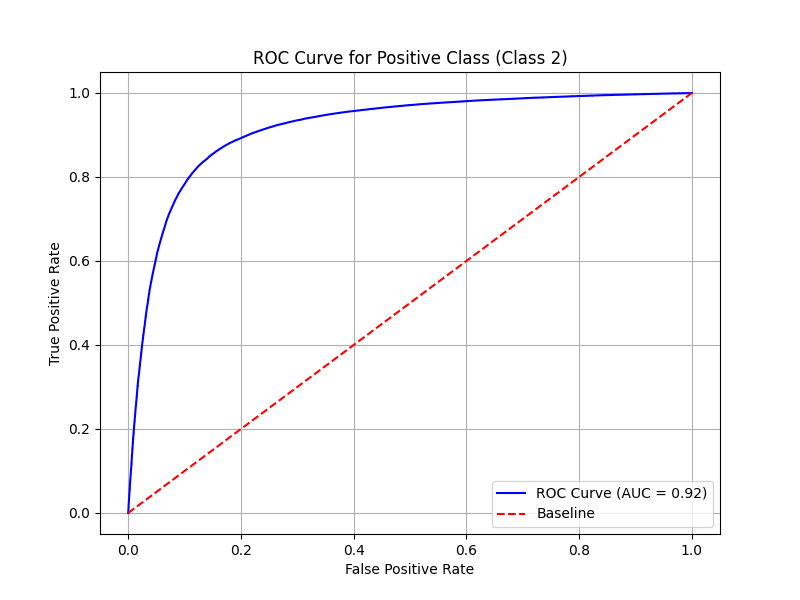

In [48]:
%matplot plt

<span style="color:rgb(75,0,130); font-weight:bold; font-size: 16px"> ROC Curve for Negative Class </span>

In [49]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_n, tpr_n, label=f"ROC Curve (AUC = {auc_neg:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Baseline", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Negative Class (Class 1)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

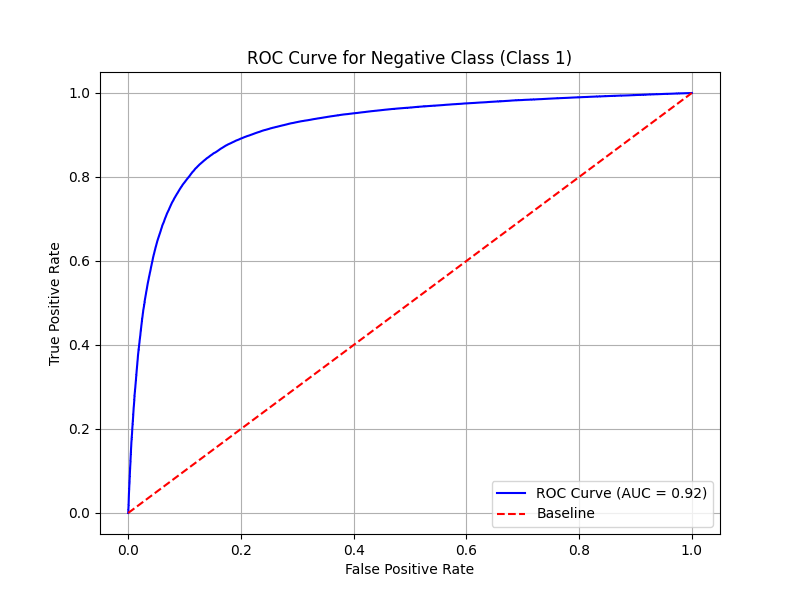

In [50]:
%matplot plt

<span style="color:green; font-weight: bold; font-size: 13px"> The AUC for binary classes is always the same. The ROC is always symmetric to the binary classes, as observed in the plots.</span>

<span style="color:brown; font-weight: bold; font-size: 16px"> DISCUSSION: From the Data Science pipeline workflow, the results from Evaluation Stage, states that Logistic Regression Model has generalized well to the test data which is the unseen data after being trained on the training data. Though, it cannot be said that it is works perfectly but, 85% test accuracy is fairly good for a model to predict the sentiment from the text data and perform Text Classification. The accuracy can be improved further, by carrying out other tasks specific to sampling, feature engineering and modeling with cross validation.</span>